In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rotate

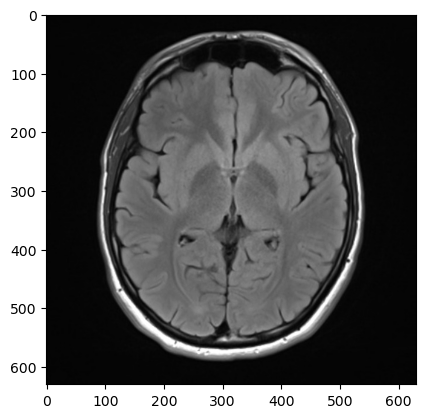

In [41]:
img = cv2.imread("brain.jpeg", cv2.IMREAD_GRAYSCALE)
size = img.shape[0]
plt.imshow(img, cmap='gray')

## Generate sinogram using forward projection

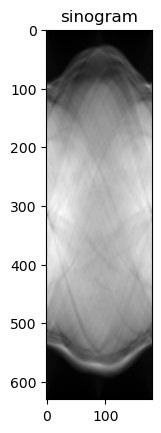

In [42]:
# Convert Image to Sinogram
angles = np.arange(1,181)
sinogram_img = np.zeros((size, len(angles)), dtype=np.float32)

for i in range(180):
    sinogram_img[:,i] = rotate(img, angles[i]).sum(axis=0)

plt.imshow(sinogram_img, cmap='gray')
plt.title('sinogram')
plt.show()

## Reconstruct CT image from the sinogram using back projection

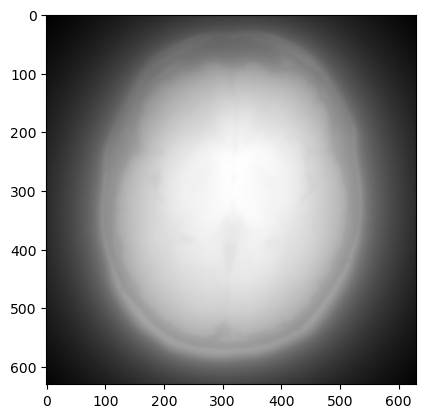

In [43]:
size = sinogram_img.shape[0]
f = np.zeros((size, size), dtype=np.float32)

x = np.linspace(-size/2, size/2-1, size)
y = np.linspace(-size/2, size/2-1, size)

f_x, f_y = np.meshgrid(x, y)

angles = np.arange(1,181)
angles = angles * np.pi/180

for i, angle in enumerate(angles):
  rho = np.round(f_x * np.cos(angle) + f_y * np.sin(angle) + size/2).astype('int')
  rho = np.clip(rho, 0, size-1).astype(int)                                                            
  f += sinogram_img[:, i][rho]


f = np.uint8(255 * (f - np.min(f))/ (np.max(f)-np.min(f)))

plt.imshow(f, cmap='gray')
plt.show()

## Apply a simple histogram equalization for a better visualization

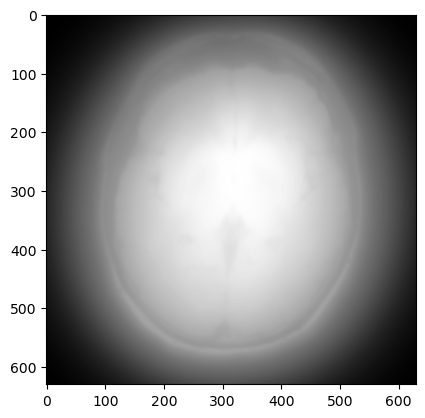

In [44]:
hist = np.zeros((256, ))


N, M = f.shape[0], f.shape[1]

for i in range(N):
  for j in range(M):
    hist[f[i, j]] += 1

norm_hist = hist / (M * N)
cdf = np.cumsum(norm_hist)
eq_cdf = np.uint8(255 * cdf)

eq_im = np.zeros_like(f)

for i in range(N):
  for j in range(M):
    eq_im[i, j] = eq_cdf[f[i, j]]

plt.imshow(eq_im, cmap='gray')

## Apply a high-pass filter onto the sinogram in the frequency domain

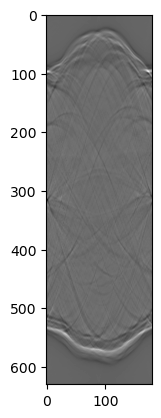

In [45]:
filter = np.abs(np.fft.fftfreq(size, d=0.5))

f_0 = np.zeros_like(sinogram_img)

for col in range(len(angles)):

  proj = np.fft.fft(sinogram_img[:, col])
  f_0[:, col] = np.real(np.fft.ifft(proj * filter))

plt.imshow(f_0, cmap='gray')
plt.show()

## Perform back projection on the filtered sinogram

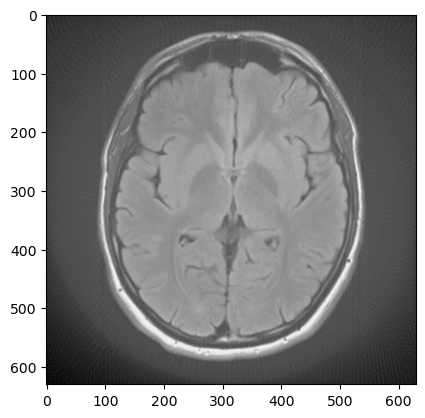

In [46]:
f = np.zeros((size, size), dtype=np.float32)

angles = np.arange(1,181)
angles = angles * np.pi/180

for i, angle in enumerate(angles):
  rho = np.round(f_x * np.cos(angle) + f_y * np.sin(angle) + size/2).astype('int')
  rho = np.clip(rho, 0, size-1).astype(int)                                                            
  f += f_0[:, i][rho]


f = np.uint8(255 * (f - np.min(f))/ (np.max(f)-np.min(f)))

plt.imshow(f, cmap='gray')
plt.show()

# We use the same exact method to backproject the filtered sinogram.

## Simulate several c-ray detectors being out of order with some rows of the sinogram set to zero values

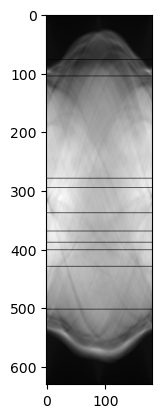

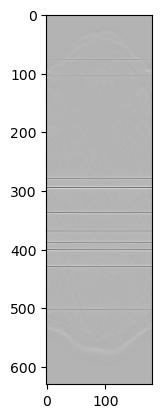

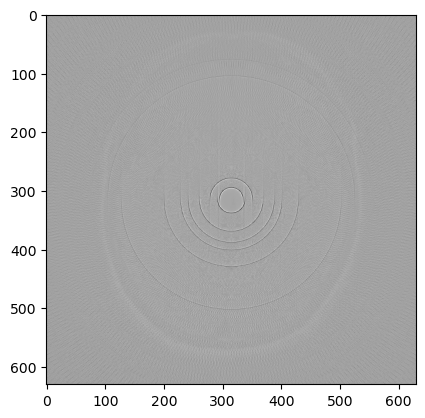

In [47]:
black_sinogram = sinogram_img.copy()

num_rows = black_sinogram.shape[0]
random_rows = np.random.choice(num_rows, size=10, replace=False)
black_sinogram[random_rows, :] = 0

plt.imshow(black_sinogram, cmap='gray')
plt.show()

filter = np.abs(np.fft.fftfreq(size, d=0.5))

f_0 = np.zeros_like(black_sinogram)

for col in range(len(angles)):

  proj = np.fft.fft(black_sinogram[:, col])
  f_0[:, col] = np.real(np.fft.ifft(proj * filter))

plt.imshow(f_0, cmap='gray')
plt.show()

f = np.zeros((size, size), dtype=np.float32)

angles = np.arange(1,181)
angles = angles * np.pi/180

for i, angle in enumerate(angles):
  rho = np.round(f_x * np.cos(angle) + f_y * np.sin(angle) + size/2).astype('int')
  rho = np.clip(rho, 0, size-1).astype(int)                                                            
  f += f_0[:, i][rho]


f = np.uint8(255 * (f - np.min(f))/ (np.max(f)-np.min(f)))

plt.imshow(f, cmap='gray')
plt.show()

## Simulate some view angles of the x-ray sources being out of order with some columns of the sinogram set to zero values

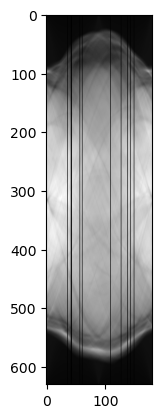

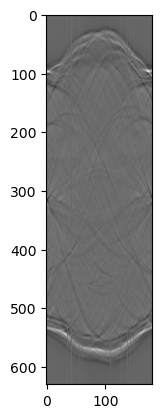

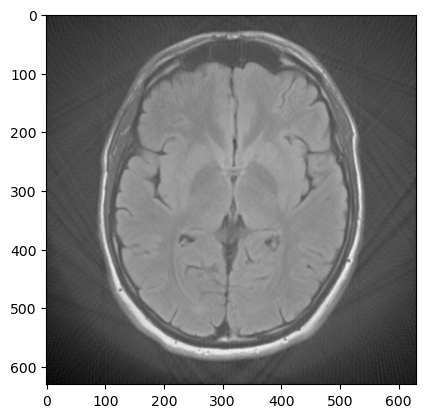

In [48]:
black_sinogram = sinogram_img.copy()

num_cols = black_sinogram.shape[1]

# Select 10 random rows
random_cols = np.random.choice(num_cols, size=10, replace=False)

# Set the pixel values of the selected rows to zero
black_sinogram[:, random_cols] = 0

plt.imshow(black_sinogram, cmap='gray')
plt.show()

filter = np.abs(np.fft.fftfreq(size, d=0.5))

f_0 = np.zeros_like(black_sinogram)

for col in range(len(angles)):

  proj = np.fft.fft(black_sinogram[:, col])
  f_0[:, col] = np.real(np.fft.ifft(proj * filter))

plt.imshow(f_0, cmap='gray')
plt.show()

f = np.zeros((size, size), dtype=np.float32)

angles = np.arange(1,181)
angles = angles * np.pi/180

for i, angle in enumerate(angles):
  rho = np.round(f_x * np.cos(angle) + f_y * np.sin(angle) + size/2).astype('int')
  rho = np.clip(rho, 0, size-1).astype(int)                                                            
  f += f_0[:, i][rho]


f = np.uint8(255 * (f - np.min(f))/ (np.max(f)-np.min(f)))

plt.imshow(f, cmap='gray')
plt.show()